# **SEJA BEM VINDO(a)!**

*Neste projeto o objetivo é treinar a mineração de textos, utilizando o WORD CLOUD, que é uma forma prática de descobrir as palavras mais relevantes em um determinado texto.*

Abaixo um exemplo!

In [ ]:
https://theappassembly.com/wp-content/uploads/2016/11/BigDataWordMap-1264x736.jpg

# **PROBLEMA DO NEGÓCIO**

Nos foi dada a tarefa de descrobrir quais as palavras e termos mais usados pelos anfitriões(donos de imóveis) e com isso, ajudá-los a criar anúncios e ofertas mais assertivos.

**Resultado final:** Tal prática pode aumentar o número de locações, reduzir custos e aumentar seu faturamento.

**Fonte de dados**

Para isso, usaremos um dataset da própria Airbnb no seguinte site:

http://insideairbnb.com/get-the-data.html

**Importações**

In [18]:
# PANDAS - manipulação de dados
# NUMPY - computação numérica
# MATPLOTLIB - gerar os gráficos
# PIL - visualização exportação de imagens
# WORDCLOUD - pacote para nuvem de palavras

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# STOPWORDS evita a repetição de palavras que não sejam importantes para nossos objetivos
# ImageColorGenerator cria a nuvem de palavras

**Importando os dados**

In [ ]:
data = pd.read_csv('listings.csv')

**1 - ANÁLISE EXPLORATÓRIA**

In [ ]:
# verificando o tamando do dataset
data.shape

In [ ]:
# Tipos dos dados
data.dtypes

In [ ]:
# Visualizando as 5 primeiras linhas
data.head()

In [ ]:
# Visualizando as últimas 5 linhas
data.tail()

In [ ]:
# Disposição dos dados
data.describe()

In [ ]:
# Busca por valores 'missing'
data.isnull().sum()

*A coluna que nos interessa para a análise é "summary"*

In [17]:
# Elininando valores ausentes de 'Summary'
summary = data.dropna(subset=['summary'], axis = 0)['summary']

In [ ]:
# Verificando alguns exemplos aleatórios de 'summary' contidas no dataset
display(summary.iloc[50])
display(summary.iloc[100])
display(summary.iloc[200])
display(summary.iloc[300])

*Há a necessidade de concatenar as palavras em uma única célula, para facilitar a análise do Word Cloud, que vai quebrar cada palavra e vai calcular a frequência de cada uma delas. (Mais frequentes = maiores, Menos Frequentes = menores).*

In [21]:
# Concatenação
all_summary = ' '.join(s for s in summary) #vetor

In [28]:
# Listando as STOPWORDS (palavras sem sentido para a análise)
# Dentro do próprio Wordcloud já existe um banco de dados com algumas, mas faremos uma atualização
stopwords = set(STOPWORDS)
stopwords.update(['da', 'meu', 'em', 'você', 'de', 'ao', 'os', 'por'])

In [29]:
# Gerando a Word Cloud
wordcloud = WordCloud(stopwords = stopwords,
                      background_color='green',
                      width = 1500,
                      height = 800).generate(all_summary)

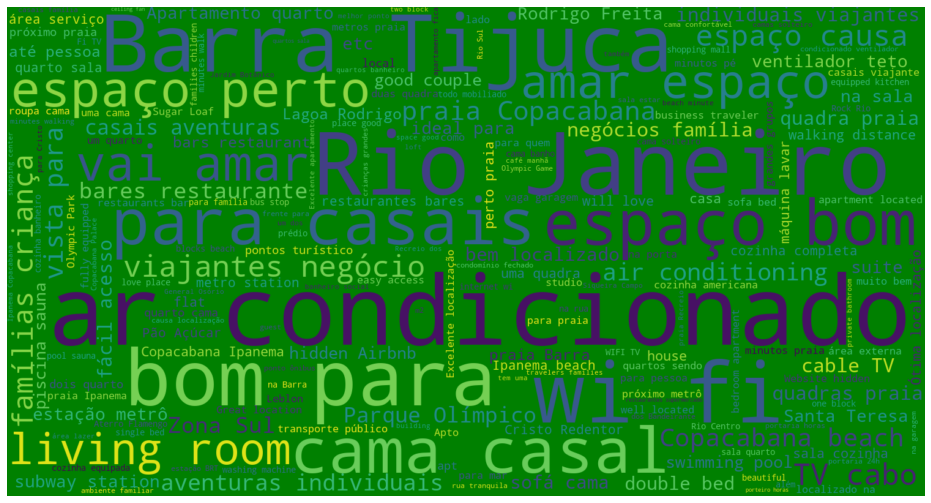

In [31]:
# Gerando a imagem 
fig, ax = plt.subplots(figsize = (20,9))
ax.imshow(wordcloud, interpolation = 'bilinear')
ax.set_axis_off()

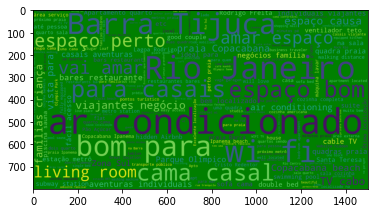

In [32]:
# Exportação da imagem
plt.imshow(wordcloud)
wordcloud.to_file('summary-wordcloud-image.png')

In [34]:
# Utilizando uma imagem junto com a Word Cloud
rj_map = np.array(Image.open('/content/summary-wordcloud-image.png'))

In [37]:
# Gerando uma Word Cloud sobre a imagem
wordcloud = WordCloud(stopwords = stopwords,
                      background_color='green',
                      width = 1500,
                      height = 800,
                      mask = rj_map,
                      max_words = 100,
                      min_font_size = 1).generate(all_summary)

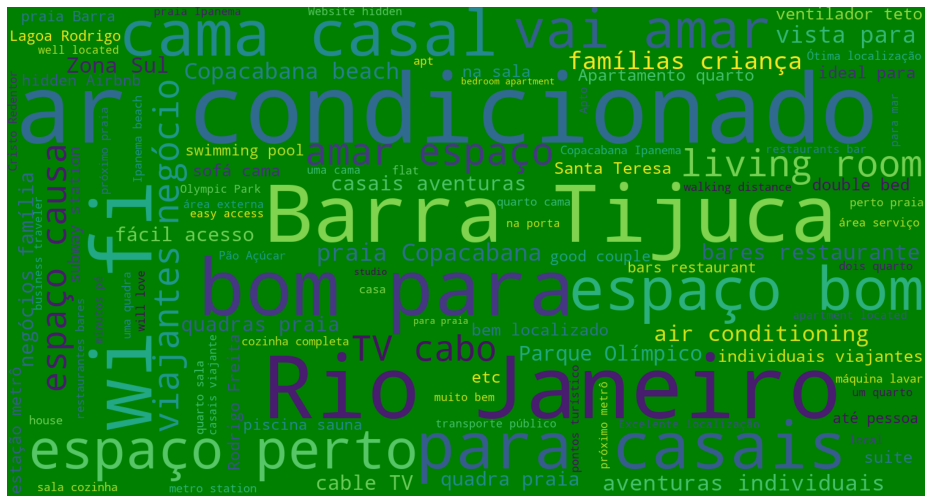

In [38]:
# Gerando a imagem 
fig, ax = plt.subplots(figsize = (20,9))
ax.imshow(wordcloud, interpolation = 'bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file('summary-wordcloud-map-rj.png')

# **OBRIGADO!**

Créditos:

*Carlos Melo (Sigmoidal.ai)*

*Eduardo Rocha (Ciência de Dados)*